[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


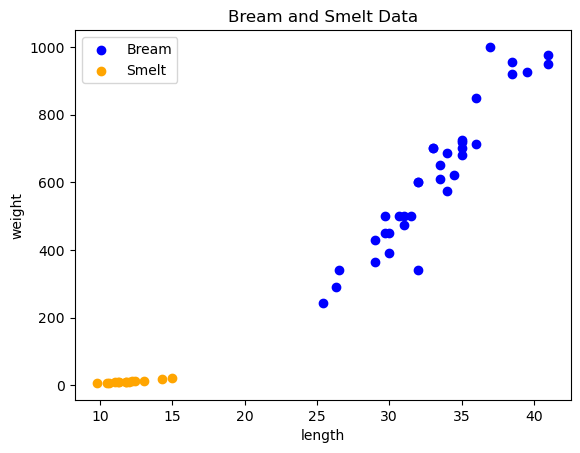

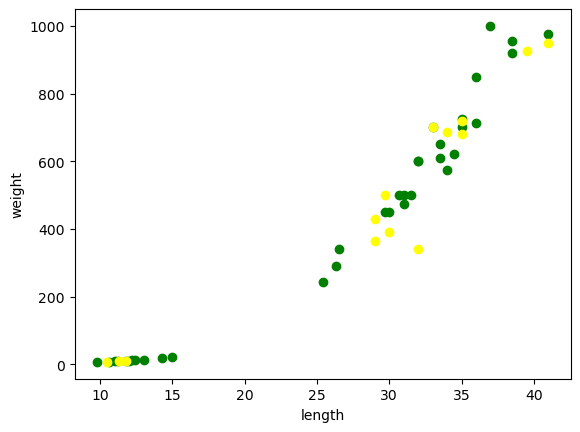

In [75]:
##########################################################
# 6강 : (분류1/4) KNeighborsClassifier
# 데이터 수집 + 그래프 확인 + 데이터 구분
##########################################################
# 도미(길이,무게) 데이터(35개) 입력
bream_length =[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어(길이,무게) 데이터(14) 입력
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 도미와 빙어 데이터 병합(35+14) 입력
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 전체(data)
fish_data = [[l, w] for l, w in zip(length, weight)]
# 정답(target)
fish_target = [1]*35 + [0]*14

print(fish_data)
print(fish_target)
      
# 도미와 빙어 데이터 시각화 
import matplotlib.pyplot as plt

# Bream 데이터는 파란색으로, Smelt 데이터는 주황색으로 그리기
plt.scatter(bream_length, bream_weight, label='Bream', color='blue')
plt.scatter(smelt_length, smelt_weight, label='Smelt', color='orange')

# 그래프에 레이블 추가
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Bream and Smelt Data')
plt.legend()
plt.show() # 산점도 출력

# 넘파이 적용하여 적절하게 배분
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1], color='green')
plt.scatter(test_input[:, 0], test_input[:, 1], color='yellow')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


1.0
1.0


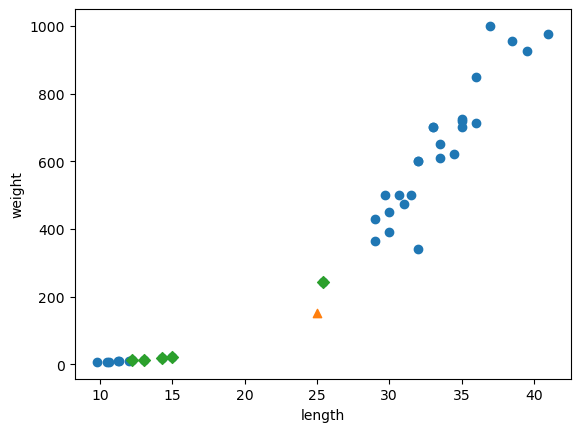

In [77]:
##########################################################
# 6강 : (분류2/4) KNeighborsClassifier
# 데이터 배분 + K-NN 학습 + 30,600 예측
##########################################################
# index 배열로 데이터 배분 자동화
# 훈련세트 크기가 작을 경우 stratify 매개변수에 target을 지정하여 균등하게 배분

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
fish_data, fish_target, stratify=fish_target, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

#훈련(입력 데이터 그대로 편향)
kn.fit(fish_data, fish_target)
#평가
print(kn.score(fish_data, fish_target))


#훈련(데이터 고르기 실시)
kn.fit(train_input, train_target)
#평가
print(kn.score(test_input, test_target))

# 새로운 생선 예측 (1: 도미, 0:빙어)
distances, indexes = kn.kneighbors([[25,150]])

import matplotlib.pyplot as plt

train_input = np.array(train_input)  # 리스트를 넘파이 배열로 변환
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()




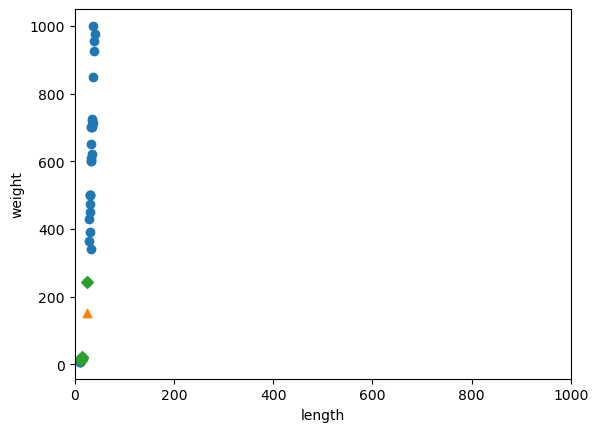

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

In [81]:
##########################################################
# 6강 : (분류3/4) KNeighborsClassifier
# 스케일 조정후 그래프 재확인 
##########################################################
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


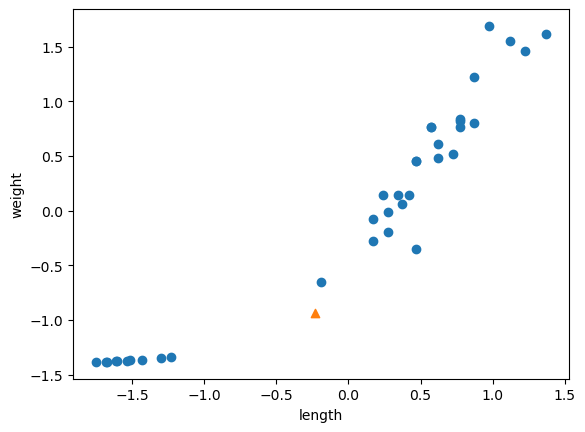

[1]


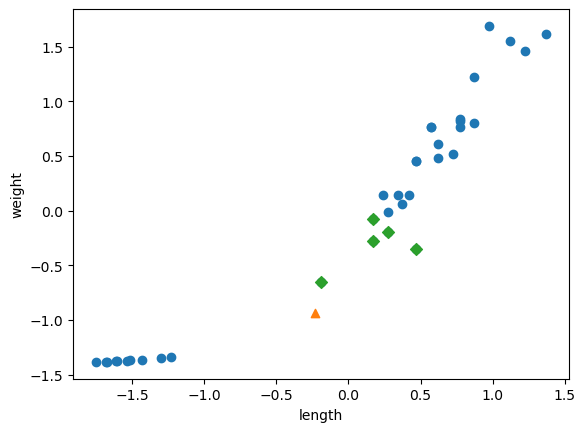

In [93]:
##########################################################
# 6강 : (분류4/4) KNeighborsClassifier
# 표준점수(Z점수) : (특성-평균)/표준편차 
##########################################################

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

train_scaled = (train_input - mean) / std

new = ([25, 150]- mean)/std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]
(56,)
(56,)


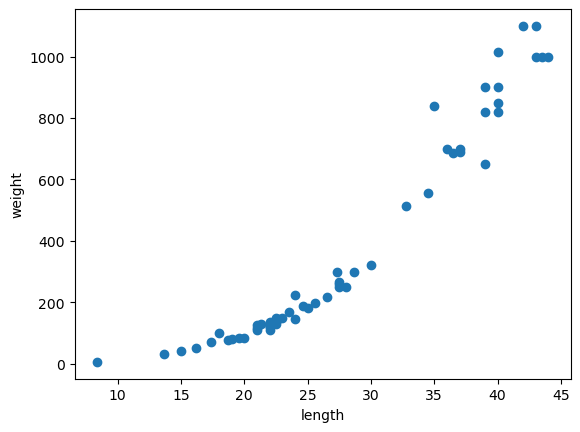

(42,) (14,)
(42, 1) (14, 1)
[[27.5]
 [40. ]
 [32.8]
 [19. ]
 [22. ]
 [25. ]
 [28.7]
 [40. ]
 [22. ]
 [43. ]
 [28. ]
 [22. ]
 [18. ]
 [26.5]
 [22. ]
 [43.5]
 [22.5]
 [40. ]
 [19.6]
 [21.3]
 [24. ]
 [22. ]
 [36. ]
 [44. ]
 [34.5]
 [13.7]
 [21. ]
 [37. ]
 [24. ]
 [18.7]
 [23.5]
 [30. ]
 [22.7]
 [22.5]
 [20. ]
 [35. ]
 [42. ]
 [16.2]
 [ 8.4]
 [43. ]
 [40. ]
 [39. ]]
[[39. ]
 [27.5]
 [36.5]
 [24.6]
 [21. ]
 [15. ]
 [27.5]
 [37. ]
 [39. ]
 [27.3]
 [17.4]
 [21. ]
 [25.6]
 [23. ]]
0.9831253192289525
0.9162089041423581
Mean Absolute Error (MAE): 42.27142857142858
R^2 Score: 0.9162089041423581


In [37]:
##########################################################
# 6강 : (회귀1/5) KNeighborsRegressor
# 데이터 수집 + 그래프 확인 + 데이터 구분 + K-NN 학습
##########################################################

################
# 데이터 수집
################
import numpy as np

# Features : 도미의 길이
bream_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

# Target : 도미의 무게
bream_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(bream_length)
print(bream_weight)
print(bream_length.shape)
print(bream_weight.shape)

################
# 그래프 확인
################
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


################
# 데이터 구분
################
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기 
train_input, test_input, train_target, test_target = train_test_split(
    bream_length, bream_weight, random_state=0)
print(train_input.shape, test_input.shape)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
print(train_input)
print(test_input)

################
# K-NN 학습,평가
################
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# k-최근접 이웃 회귀 모델을 훈련
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 테스트 세트에 대한 예측을 만들기
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
r2 = r2_score(test_target, test_prediction)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")



[1040.]
Prediction for length 50: 1040.0


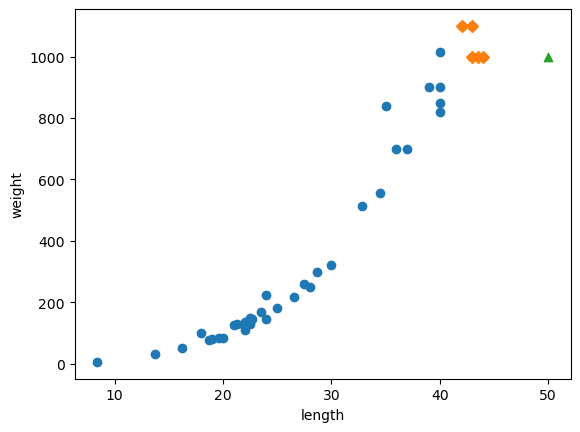

In [39]:
##########################################################
# 6강 : (회귀2/3) KNeighborsRegressor
# 새로운 데이터 길이 50일때의 무게를 예측
##########################################################
prediction_for_50 = knr.predict([[50]])
print(f"Prediction for length 50: {prediction_for_50[0]}")

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

Prediction for length 100: 1040.0


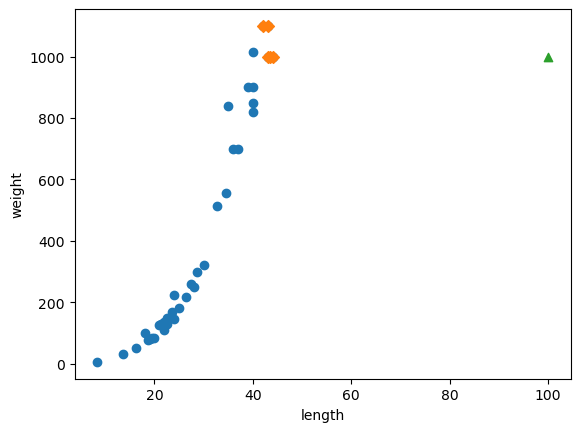

In [41]:
##########################################################
# 6강 : (회귀3/3) KNeighborsRegressor
# 새로운 데이터 길이 100일때의 무게를 예측
##########################################################
prediction_for_100 = knr.predict([[100]])
print(f"Prediction for length 100: {prediction_for_100[0]}")

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(100, 1000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

n_neighbors = 1
Mean Absolute Error (MAE): 36.17857142857143
R^2 Score: 0.9214764815312678



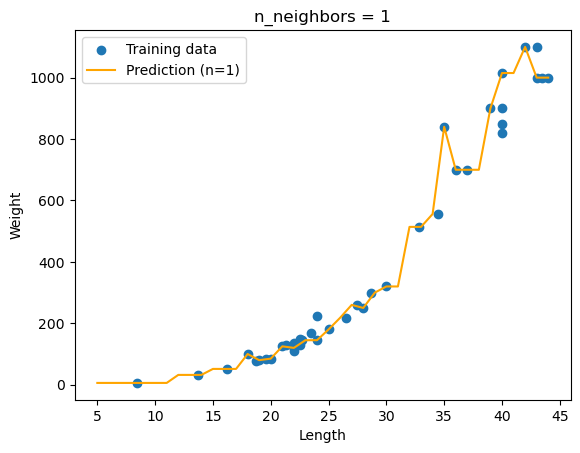

n_neighbors = 5
Mean Absolute Error (MAE): 42.27142857142858
R^2 Score: 0.9162089041423581



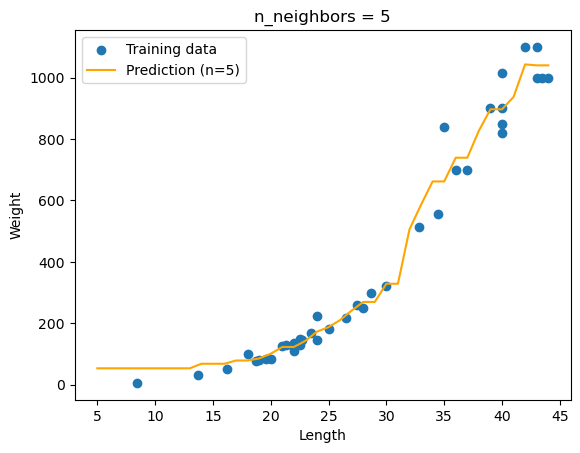

n_neighbors = 10
Mean Absolute Error (MAE): 56.535000000000004
R^2 Score: 0.888484088129014



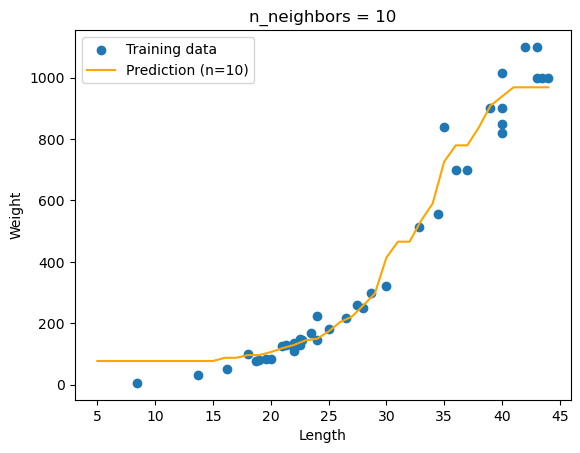

In [43]:
##########################################################
# 6강 : (회귀3/3) KNeighborsRegressor
# K이웃의 수를 변경하면서 실행
##########################################################

# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 예측값 생성
    prediction = knr.predict(x)
    
    # 테스트 세트에 대한 예측
    test_prediction = knr.predict(test_input)
    
    # 성능 평가 (MAE와 R^2 score)
    mae = mean_absolute_error(test_target, test_prediction)
    r2 = r2_score(test_target, test_prediction)
    
    # 결과 출력
    print(f"n_neighbors = {n}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}\n")
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='Training data')
    plt.plot(x, prediction, label=f'Prediction (n={n})', color='orange')
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

[1228.52162131]
[37.76648694] -659.8027258214022


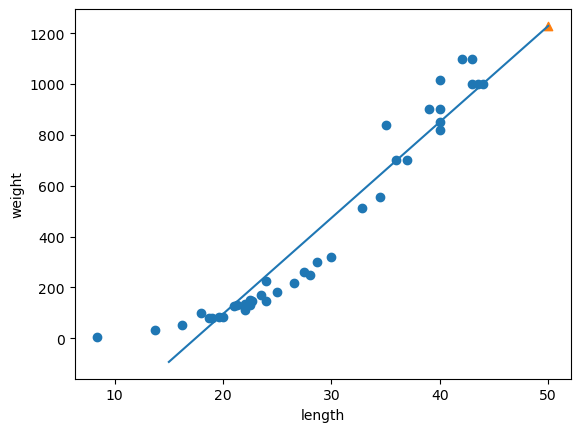

0.922603499955257
0.8803680435261592


In [27]:
##########################################################
# 6강(추가) : 선형회귀 분석 비교 (1/3)
##########################################################

from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 훈련
lr = LinearRegression()

lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1228.5, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

(42, 2) (14, 2)
[1569.60036007]
[  0.99334411 -20.28904844] 100.69251536566048


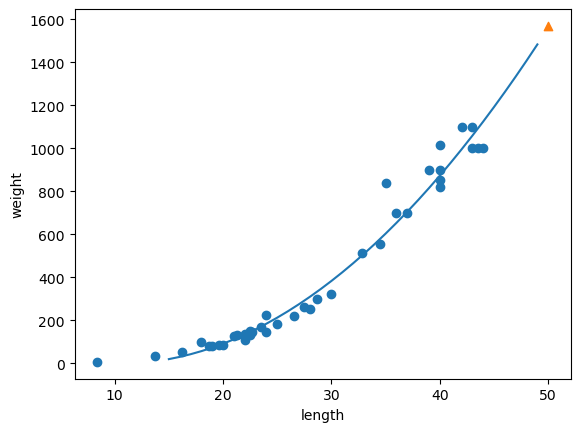

0.9734828103169649
0.9624346725637875


In [31]:
##########################################################
# 6강(추가) : 선형회귀 분석 비교 (2/3) 다항식 50 예측
##########################################################

# 비선형식을 위해서 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

#다항회귀 훈련후 50 예측
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만들기
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그리기
plt.plot(point, 0.99*point**2 - 20.3*point + 100.69)
# 50cm 농어 데이터
plt.scatter([50], [1569], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[8005.22873793]
[  0.99334411 -20.28904844] 100.69251536566048


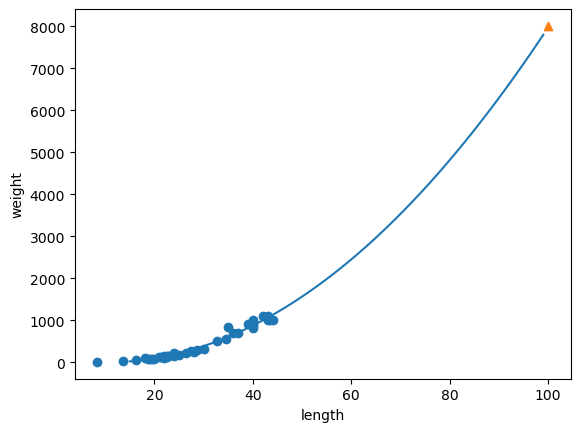

0.9734828103169649
0.9624346725637875


In [33]:
##########################################################
# 6강(추가) : 선형회귀 분석 비교 (3/3) 다항식 100 예측
##########################################################

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[100**2, 100]]))
print(lr.coef_, lr.intercept_)

# 구간별 직선을 그리기 위해 15에서 99까지 정수 배열을 만들기
point = np.arange(15, 100)
# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 15에서 99까지 2차 방정식 그래프를 그리기
plt.plot(point, 0.99*point**2 - 20.29*point + 100.69)
# 100cm 농어 데이터
plt.scatter([100], [8005], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [117]:
##########################################################
# 6강 : SVM 선형분리 svm.SVC(kernel = 'linear')
##########################################################
import pandas as pd 
import sklearn.datasets as d
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# breast_cancer 데이터 셋 로드
x = d.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target
#print(cancer.info())
#print(cancer.describe())
print(cancer.target.value_counts())

# 독립 변수 X와 종속 변수 y 설정
X = cancer.drop('target', axis=1)  # target 열을 제외한 나머지를 X로 설정
y = cancer['target']  # target 열을 y로 설정

# SVM, kernel = 'linear'로 선형분리 진행 
svm_clf =svm.SVC(kernel = 'linear')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)

# 교차 검증 결과를 pandas DataFrame으로 출력
print(pd.DataFrame(cross_validate(svm_clf, X, y, cv =5)))
print('교차검증 평균: ', scores.mean())

target
1    357
0    212
Name: count, dtype: int64
   fit_time  score_time  test_score
0  0.504113    0.002000    0.947368
1  1.184568    0.002008    0.929825
2  0.754877    0.002001    0.973684
3  0.382086    0.001000    0.921053
4  0.676152    0.001000    0.955752
교차검증 평균:  0.9455364073901569


In [131]:
##########################################################
# 6강 : SVM 비선형분리 svm.SVC(kernel = 'rbf')
##########################################################
 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)

print(pd.DataFrame(cross_validate(svm_clf, X, y, cv =5)))
print('교차검증 평균: ', scores.mean())

   fit_time  score_time  test_score
0  0.004052    0.002006    0.850877
1  0.003010    0.002008    0.894737
2  0.003025    0.003012    0.929825
3  0.003056    0.002007    0.947368
4  0.003011    0.003009    0.938053
교차검증 평균:  0.9121720229777983


In [129]:
##########################################################
# 6강(추가) : SVM 선형분리 svm.SVC(kernel = 'linear') 
# StandarScaler 적용
##########################################################

import pandas as pd
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # ms 대신 직접 임포트
from sklearn.model_selection import cross_val_score, cross_validate

# 유방암 데이터셋 로드 및 DataFrame 변환
cancer_data = load_breast_cancer()
cancer = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer['target'] = cancer_data.target

X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

# StandarScaler 적용
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

# SVM, kernel = 'linear'로 선형분리 진행 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 변환된 X로 교차검증
scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)

print(pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv =5)))
print('교차검증 평균: ', scores.mean())

   fit_time  score_time  test_score
0  0.003001         0.0    0.956140
1  0.002000         0.0    0.982456
2  0.003000         0.0    0.964912
3  0.002001         0.0    0.964912
4  0.003001         0.0    0.982301
교차검증 평균:  0.9701443875174661


In [133]:
##########################################################
# 6강(추가) : SVM 선형분리 svm.SVC(kernel = 'linear') 
# 파라미터를 튜닝하기 위해서 GridSearchCV를 활용
##########################################################
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
svm_clf = svm.SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
3,1.000,0.974873
1,0.010,0.969778
2,0.100,0.969778
4,10.000,0.957310
5,25.000,0.957278
6,50.000,0.957278
7,100.000,0.957278
0,0.001,0.947120


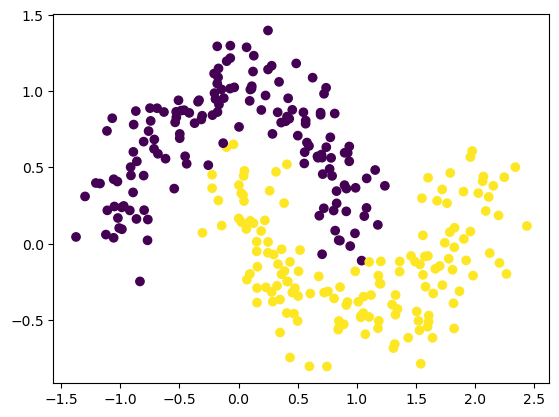

   fit_time  score_time  test_score
0  0.002023    0.001004    0.866667
1  0.002007    0.000000    0.883333
2  0.001002    0.000000    0.883333
3  0.001001    0.000000    0.833333
4  0.002116    0.000000    0.833333
선형 : 교차검증 평균:  0.86
   fit_time  score_time  test_score
0  0.000000    0.001004    0.983333
1  0.001004    0.000000    0.966667
2  0.000000    0.001004    0.983333
3  0.001004    0.000000    0.950000
4  0.001064    0.001004    0.966667
비선형 교차검증 평균:  0.97


In [141]:
##########################################################
# 6강(추가) : SVM 선형과 비선형 비교
##########################################################
 
import sklearn.datasets as d
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split  # ms 대신 직접 임포트

# make_moons 함수로 데이터셋 생성
# n_samples=300: 샘플 개수를 300개로 설정
# noise=0.16: 데이터에 0.16 정도의 노이즈를 추가하여 비선형성을 강화
# random_state=42: 랜덤 시드 고정으로 동일한 결과를 얻도록 설정
X, y = d.make_moons(n_samples = 300, noise = 0.16, random_state = 42)

# 2차원 공간에 X 데이터를 산점도로 시각화
# X[:,0]: X 데이터의 첫 번째 열 (x축 좌표)
# X[:,1]: X 데이터의 두 번째 열 (y축 좌표)
# c=y: 클래스 y에 따라 각 점의 색을 다르게 설정
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# SVM, kernel = 'linear'로 선형분리 진행 
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)

print(pd.DataFrame(cross_validate(svm_clf, X, y, cv =5)))
print('선형 : 교차검증 평균: ', scores.mean())

# SVM, kernel = 'rbf'로 비선형분리 진행 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)
print(pd.DataFrame(cross_validate(svm_clf, X, y, cv =5)))
print('비선형 교차검증 평균: ', scores.mean())

In [143]:
##########################################################
# 6강(추가) : SVM 비선형 파라미터 튜닝 GridSearchCV
##########################################################
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf, param_grid = parameters, cv = 5)
grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
20,0.100,10.000,0.980952
35,10.000,1.000,0.976190
27,1.000,1.000,0.976190
28,1.000,10.000,0.971429
43,25.000,1.000,0.966667
...,...,...,...
17,0.100,0.010,0.519048
22,0.100,50.000,0.519048
23,0.100,100.000,0.519048
24,1.000,0.001,0.519048


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guibe\AppData\Local\Temp\ipykernel_22624\2605833180.py:27: SyntaxWarning: invalid escape sequence '\s'
  bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')


R-squared:  0.8939286449010637
R-squared:  0.821589521510228
CV mean score:  0.4911830321485827
MSE:  0.15747437725715113


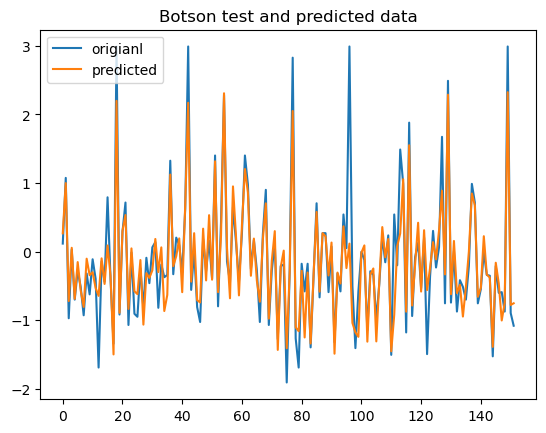

In [151]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.datasets import load_boston
# CRIM: 지역별 범죄 발생률
# ZN: 25,000평방피트를 초과하는 거주 지역의 비율
# INDUS: 비상업 지역 넓이 비율
# CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
# NOX: 일산화질소 농도
# RM: 거주할 수 있는 방 개수
# AGE: 1940년 이전에 건축된 소유 주택의 비율
# DIS: 5개 주요 고용센터까지의 가중 거리
# RAD: 고속도로 접근 용이도
# TAX: 10,000달러당 재산세율
# PTRATIO: 지역의 교사와 학생 수 비율
# B: 지역의 흑인 거주 비율
# LSTAT: 하위 계층의 비율
# MEDV: 본인 소유의 주택 가격(중앙값)

# 1. 데이터 불러오기
bostonDF = pd.read_csv('https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-04/housing.data.txt', header=None, sep='\s+')

# 2. 컬럼 이름 설정
bostonDF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 3. PRICE라는 컬럼에 MEDV 값을 복사 (MEDV는 주택 가격을 나타냄)
bostonDF['PRICE'] = bostonDF['MEDV']

y = bostonDF['PRICE']
X = bostonDF.drop(['PRICE', 'MEDV'], axis=1, inplace=False)

# StandardScale
y = scale(y)
X = scale(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

svr = SVR(kernel='rbf', gamma='auto')
svr.fit(xtrain, ytrain)

score = svr.score(xtest, ytest)
print("R-squared: ", score)

cv_score = cross_val_score(svr, X, y, cv=5)
print("CV mean score: ", cv_score.mean())

ypred = svr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label='origianl')
plt.plot(x_ax, ypred, label="predicted")
plt.title("Botson test and predicted data")
plt.legend()
plt.show()